___
## <span style='color:#0d5874'> TP2 : introduction aux modèles génératifs </span>
___

<span style='color:Red'>**L’objectif de cette séance de TP est de réaliser un bref tour d’horizon des modèles génératifs auto-encodeurs**</span>


Ce TP s'effectue individuellement ou en binome. Veuillez respecter les consignes suivantes pour le rendu de votre travail :

* Renommez le selon le format suivant : "DL_2024_TP_AE_prenom1_nom1_prenom2_nom2.ipynb".
* Veillez à ce que votre nom et prénom soient complétés dans la cellule ci-dessous.
* Veillez à avoir bien exécuté toutes les cellules de code et que les résultats soient tous bien visible dans le notebook sans nécessiter une ré-exécution.
* Partagez le notebook avec hana.sebia@univ-lyon1.fr

Veuillez compléter vos noms et prénoms ci-dessous :

*   **Prenom 1** : Maya
*   **Nom 1** : BOUDJEBBOUR
*   **Prenom 2** : Anis
*   **Nom 2** : AZIZI

---
<span style='color:#0d5874'> **Exercice 1 : Autoencodeurs et génération d’images** </span>

---

![autoencoder-architecture.png](autoencoder-architecture.png)



Cet exercice présente l’utilisation des autoencodeurs avec PyTorch. Nous allons utiliser un modèle simple, entièrement connecté, permettant de compresser une image en une représentation vectorielle. Cet exercice utilise MNIST comme jeu de données vu précédemment dans le TP1.

In [1]:
# Imports liés à torch
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, ToPILImage
from torchvision.utils import make_grid



# Matplotlib
import matplotlib.pyplot as plt
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
!pip install torchvision

In [3]:
BATCH_SIZE = 128

transform = transforms.Compose([transforms.ToTensor(),  transforms.Normalize((0.5,), (0.5,))])

# On télécharge et on créer la dataset d'entraienement à l'aide du module datasets de torchvision
train_dataset = datasets.MNIST(root='mnist_data',
                               train=True,
                               transform=transform,
                               download=True)

# On télécharge et on créer la dataset de test à l'aide du module datasets de torchvision
valid_dataset = datasets.MNIST(root='mnist_data',
                               train=False,
                               transform=transform)

# On définit le data loaders d'entraienement . Le data loaders permet de créer des batchs. On doit lui renseigner le batch size.
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True)

# On définit le data loaders de validation .
valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=False)



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 130MB/s]

Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 41.9MB/s]

Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 64.0MB/s]


Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.72MB/s]

Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



---
<span style='color:Green'>**Question**</span>

En utilisant l’interface [nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) de PyTorch, écrire le code qui définit un modèle autoencodeur entièrement connecté.

Ce modèle prend en entrée une image de dimensions 28×28 sous forme d’un vecteur aplati de longeur 784. On définira une variable latent_dimension qui permet de contrôler la taille du code z en sortie de l’encodeur.

Le décodeur devra prendre en entrée un code z de longueur latent_dimension et produire un vecteur aplati de longueur 28×28=784 (identique à l’image). On choisira une valeur raisonnable pour la dimension du code (par exemple, entre 30 et 250).

encoder :

1. Linear(in_features=784, out_features=1024, bias=True) ReLU()
2. Linear(in_features=1024, out_features=256, bias=True) ReLU()
3. Linear(in_features=256, out_features=128, bias=True)

decoder:

1. Linear(in_features=128, out_features=256, bias=True) ReLU()
2. Linear(in_features=256, out_features=1024, bias=True) ReLU()
3. Linear(in_features=1024, out_features=784, bias=True) Sigmoid()

---

**Indice**
Indice: l’utilisation de la méthode [.view()](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) ou de la couche [nn.Flatten()](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) peut être utile pour ré-arranger les tenseurs avant ou après les couches linéaires. Par exemple, x.view(-1, 1, 28, 28) permet de transformer un tenseur de dimensions 784 en un tenseur de dimensions (batch, 1, 28, 28)…

In [4]:
class Auto_encoder(nn.Module):

    def __init__(self,latent_dimension): # On définit
        super(Auto_encoder, self).__init__()
        ############# Votre code ici #############
        self.encoder = nn.Sequential( nn.Linear(in_features=784, out_features=1024),
                                      nn.ReLU(),
                                      nn.Linear(in_features=1024,out_features=256),
                                      nn.ReLU(),
                                      nn.Linear(in_features=256,out_features= 128))
        self.decoder = nn.Sequential( nn.Linear(in_features=128,out_features=256),
                                      nn.ReLU(),
                                      nn.Linear(in_features=256,out_features=1024),
                                      nn.ReLU(),
                                      nn.Linear(in_features=1024,out_features=784),
                                      nn.Sigmoid())

    def forward(self, x):
        ############# Votre code ici ################
        x = x.view(-1,784)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(-1,1,28,28)
        return None

auto_encoder = Auto_encoder(latent_dimension = 128)
print(auto_encoder)

Auto_encoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=784, bias=True)
    (5): Sigmoid()
  )
)


In [5]:
class Auto_encoder(nn.Module):

    def __init__(self, latent_dimension):
        super(Auto_encoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(in_features=784, out_features=1024, bias=True),
            nn.ReLU(),
            nn.Linear(in_features=1024, out_features=256, bias=True),
            nn.ReLU(),
            nn.Linear(in_features=256, out_features=128, bias=True)
        )

        self.decoder = nn.Sequential(
            nn.Linear(in_features=128, out_features=256, bias=True),
            nn.ReLU(),
            nn.Linear(in_features=256, out_features=1024, bias=True),
            nn.ReLU(),
            nn.Linear(in_features=1024, out_features=784, bias=True),
            nn.Sigmoid()
        )

    def forward(self, x):
        # Transformer x en un vecteur unidimensionnel
        x = x.view(-1, 784)

        # Encoder x
        z = self.encoder(x)

        # Décoder z
        x_hat = self.decoder(z)

        # Réarranger x en une image 28x28
        x_hat = x_hat.view(-1, 1, 28, 28)

        return x_hat

# Création d'une instance de l'autoencodeur
auto_encoder = Auto_encoder(latent_dimension=128)
print(auto_encoder)


Auto_encoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=784, bias=True)
    (5): Sigmoid()
  )
)


---
<span style='color:Green'>**Question**</span>

Initialiser la loss : On prendra la L1Loss et l'optimizer Adam avec lr=0.0001.

---


In [6]:
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(auto_encoder.parameters(),lr=0.0001)

---
<span style='color:Green'>**Question**</span>

Créez une fonction validate qui permettra d'évaluer notre modèle.

---


In [7]:
def validate(valid_loader, model, criterion):
    '''
    Function for the validation step of the training loop
    '''
    ############# Votre code ici ################
    model.eval()
    running_loss = 0.0
    for i, (images, _) in enumerate(valid_loader):
        images = images.to(device)
        model.to(device)
    X_Hat = model(images)
    loss = criterion(X_Hat, images)
    running_loss += loss.item()
    running_loss /= len(valid_loader)
    return running_loss

In [8]:
def validate(model, valid_loader, criterion, device):

    # Passer le modèle en mode évaluation
    model.eval()

    # Initialiser la loss à 0
    running_loss = 0.0

    with torch.no_grad():
        for X, _ in valid_loader:
            X = X.to(device)
            output = model(X)
            if isinstance(output, tuple):
                X_hat, _ = output
            else:
                X_hat = output

            loss = criterion(X_hat, X)

            running_loss += loss.item()

    running_loss /= len(valid_loader)
    return running_loss

---
<span style='color:Green'>**Question**</span>

---
Créer une fonction Train qui permettra d'entrainer notre modèle.

---
**Note**
Utiliser avant la fonction validate [.no_grad](https://pytorch.org/docs/stable/generated/torch.no_grad.html) pour désactiver le gradient.

---

In [9]:
def train(model, train_loader, optimizer, criterion, device, epochs=25):
    """
    Entraîne le modèle avec validation.

    :param model: Modèle à entraîner
    :param train_loader: Dataloader pour les données d'entraînement
    :param valid_loader: Dataloader pour les données de validation
    :param optimizer: Optimiseur pour la mise à jour des poids
    :param criterion: Fonction de perte utilisée
    :param device: Dispositif d'exécution (CPU ou GPU)
    :param epochs: Nombre total d'époques
    """
    # Transférer le modèle sur le dispositif
    model.to(device)

    for epoch in range(epochs):
        # Mettre le modèle en mode d'entraînement
        model.train()
        running_loss = 0.0

        for images, _ in train_loader:
            # Transférer les données sur le dispositif
            images = images.to(device)

            # Forward pass
            output = model(images)

            # Gérer les sorties multiples (exemple : tuple)
            if isinstance(output, tuple):
                X_Hat, _ = output
            else:
                X_Hat = output

            # Calcul de la perte
            loss = criterion(X_Hat, images)

            # Rétropropagation et mise à jour des poids
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accumuler la perte pour l'époque
            running_loss += loss.item()

        # Moyenne de la perte pour l'époque
        running_loss /= len(train_loader)


        # Afficher les résultats de l'époque
        print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {running_loss:.4f}')

    print('Finished Training')


In [10]:
train(auto_encoder,train_loader,optimizer,criterion,device, epochs=25)

Epoch [1/25], Train Loss: 0.9642
Epoch [2/25], Train Loss: 0.9358
Epoch [3/25], Train Loss: 0.9209
Epoch [4/25], Train Loss: 0.9081
Epoch [5/25], Train Loss: 0.8998
Epoch [6/25], Train Loss: 0.8955
Epoch [7/25], Train Loss: 0.8924
Epoch [8/25], Train Loss: 0.8903
Epoch [9/25], Train Loss: 0.8878
Epoch [10/25], Train Loss: 0.8856
Epoch [11/25], Train Loss: 0.8841
Epoch [12/25], Train Loss: 0.8830
Epoch [13/25], Train Loss: 0.8820
Epoch [14/25], Train Loss: 0.8810
Epoch [15/25], Train Loss: 0.8801
Epoch [16/25], Train Loss: 0.8793
Epoch [17/25], Train Loss: 0.8786
Epoch [18/25], Train Loss: 0.8780
Epoch [19/25], Train Loss: 0.8773
Epoch [20/25], Train Loss: 0.8767
Epoch [21/25], Train Loss: 0.8762
Epoch [22/25], Train Loss: 0.8756
Epoch [23/25], Train Loss: 0.8751
Epoch [24/25], Train Loss: 0.8747
Epoch [25/25], Train Loss: 0.8743
Finished Training


**Visualiser les images produites par l'auto-encoder avec la fonction suivante:**

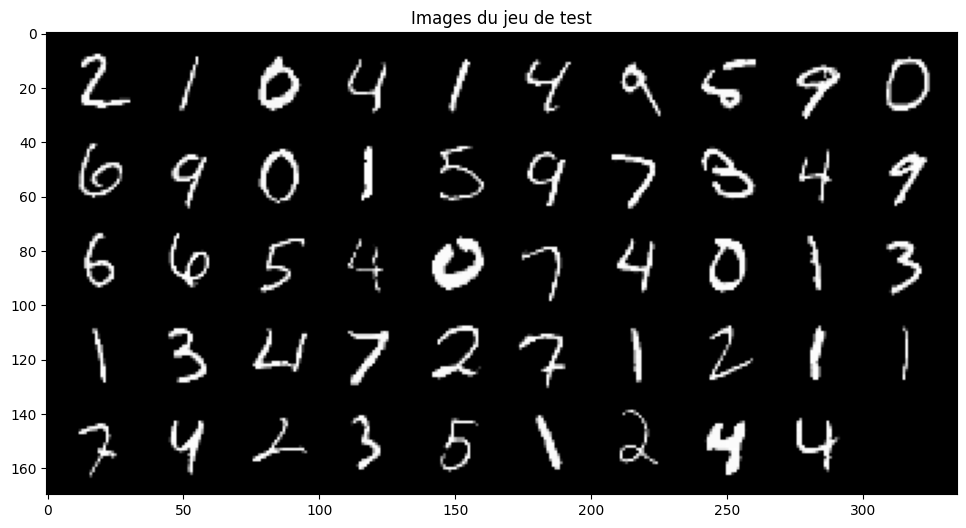

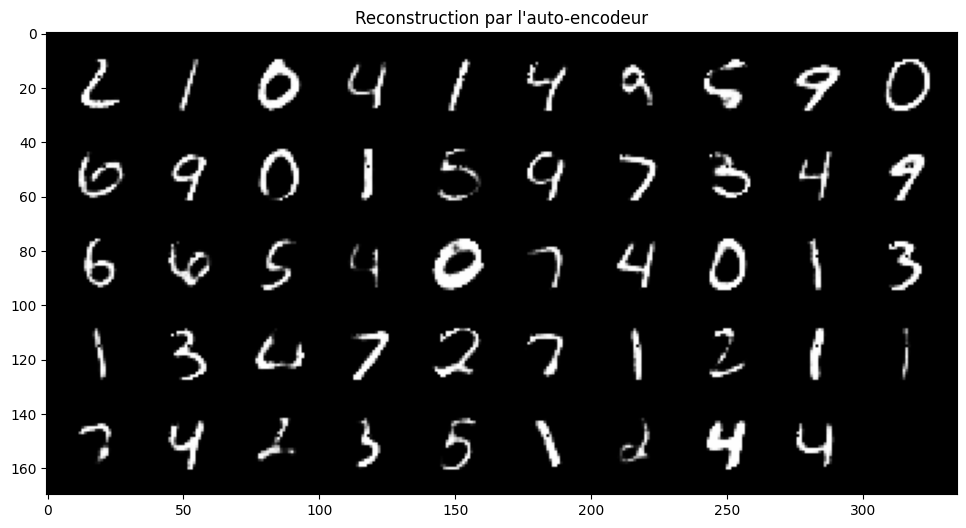

In [11]:
net = auto_encoder.eval()
test_dataloader = DataLoader(valid_dataset, batch_size=128, shuffle=False)


def show_grid(grid):
    plt.imshow(np.transpose(grid.numpy(), (1, 2, 0)))
    plt.show()

def visualize_reconstructions(net, images, device="cpu"):
    # Mode inférence
    with torch.no_grad():
        images = images.to(device)
        net.to(device)
        reconstructions = net(images)
        image_grid = make_grid(reconstructions[1:50], 10, 5)
        return image_grid.squeeze(0)

images, _ = next(iter(test_dataloader))
# Images de test
plt.figure(figsize=(12, 6))
plt.title("Images du jeu de test")
show_grid(make_grid(images[1:50],10,5))

# Reconstruction et visualisation des images reconstruites
plt.figure(figsize=(12, 6))
plt.title("Reconstruction par l'auto-encodeur")
show_grid(visualize_reconstructions(auto_encoder, images))

---
<span style='color:#0d5874'> **Exercice 2 : Autoencodeurs convolutif et génération d’images** </span>

---

**Préambule**

---
Pour commencer, nous allons charger en mémoire les données de Fashion-MNIST et en visualiser quelques unes. Ces images sont similaires en format aux données de MNIST : 28x28 pixels en niveaux de gris.

Ce jeu de données est préintégré dans la bibliothèque torchvision:

In [12]:
from torchvision.datasets import FashionMNIST

train_dataset = FashionMNIST(root='./data', train=True, download=True, transform=ToTensor())
valid_dataset = FashionMNIST(root='./data', train=False, download=True, transform=ToTensor())

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=128, shuffle=False)

100%|██████████| 26.4M/26.4M [00:01<00:00, 21.1MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 339kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 6.06MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.47MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Nous pouvons visualiser quelques unes de ces images:

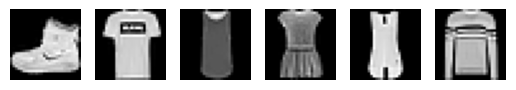

In [13]:
n_images = 5

fig = plt.figure()
for i, (image, label) in enumerate(train_dataset):
    fig.add_subplot(1, n_images+1, i+1)
    plt.imshow(ToPILImage()(image), cmap="gray")
    plt.axis("off")
    if i >= n_images:
        break
plt.show()

**Implémentation**

---

Notre modèle sera un auto-encodeur convolutif doté de l’architecture ci-dessous.

Pour l’encodeur :

* une couche de convolution (kernel_size=4, in_channels=1, out_channels=32, stride=2, padding=1, activation ReLU)

* une couche de convolution (kernel_size=4, in_channels=32, out_channels=64, stride=2, padding=1, activation ReLU)

* une couche linéaire (in_features=64\*7\*7, out_features=latent_dimension)

Pour le décodeur:

* une couche linéaire (in_features=latent_dimension, out_features=64\*7\*7, activation ReLU)

* une couche de convolution transposée (kernel size=4, in_channels=64, out_channels=32, stride=2, padding=1, activation ReLU)

* une couche de convolution transposée (kernel size=4, in_channels=32, out_channels=1, stride=2, padding=1, activation sigmoide)

---
**Note**
Les filtres convolutifs sont choisis de taille 4x4 afin d’éviter des problèmes [d’aliasing](https://distill.pub/2016/deconv-checkerboard/).

---

<span style='color:Green'>**Question**</span>

---

Compléter l’implémentation ci-dessous de l’auto-encodeur dont l’architecture vient d’être décrite. Cette implémentation utilise l’interface torch.nn.Module dont la documentation peut vous être utile.

En plus de la reconstruction par l’auto-encodeur, on souhaite que la méthode forward() renvoie également le code intermédiaire z (un vecteur de longueur latent_dimension) obtenu après le passage dans le décodeur.

---

**Indice**
l’utilisation de la méthode .view() ou de la couche nn.Flatten() peut être utile pour ré-arranger les tenseurs avant ou après les couches linéaires. Par exemple, x.view(-1, 64, 7, 7) permet de transformer un tenseur de dimensions (batch, 3136) en un tenseur de dimensions (batch, 64, 7, 7)…

---

In [14]:
class AutoEncoder_conv(nn.Module):
    def __init__(self, latent_dimension):
        super(AutoEncoder_conv, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64*7*7, latent_dimension)
        )

        # Decoder
        self.decoder_linear = nn.Linear(latent_dimension, 64*7*7)

        self.decoder = nn.Sequential(
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        # Encoder
        z = self.encoder(x)

        # Decoder
        x_hat = self.decoder_linear(z)
        x_hat = x_hat.view(-1, 64, 7, 7)
        x_hat = self.decoder(x_hat)

        return x_hat, z


autoencoder_conv = AutoEncoder_conv(latent_dimension=10)
print(autoencoder_conv)

AutoEncoder_conv(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=3136, out_features=10, bias=True)
  )
  (decoder_linear): Linear(in_features=10, out_features=3136, bias=True)
  (decoder): Sequential(
    (0): ReLU()
    (1): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (2): ReLU()
    (3): ConvTranspose2d(32, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): Sigmoid()
  )
)


**Entraînement**

---

Une fois le modèle implémenté, nous pouvons utiliser la fonction train et validate implémentées précedemment pour réaliser l'apprentissage. L’optimisation se fait selon le critère choisi dans la variable criterion (par défaut, il s’agit de l’erreur quadratique moyenne comme critère de reconstruction).

In [15]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder_conv.parameters(),lr=1e-3, weight_decay=1e-5)

In [16]:
train(autoencoder_conv,train_loader,optimizer,criterion,device, epochs=25)

Epoch [1/25], Train Loss: 0.0287
Epoch [2/25], Train Loss: 0.0167
Epoch [3/25], Train Loss: 0.0153
Epoch [4/25], Train Loss: 0.0146
Epoch [5/25], Train Loss: 0.0141
Epoch [6/25], Train Loss: 0.0137
Epoch [7/25], Train Loss: 0.0135
Epoch [8/25], Train Loss: 0.0133
Epoch [9/25], Train Loss: 0.0131
Epoch [10/25], Train Loss: 0.0130
Epoch [11/25], Train Loss: 0.0128
Epoch [12/25], Train Loss: 0.0127
Epoch [13/25], Train Loss: 0.0126
Epoch [14/25], Train Loss: 0.0125
Epoch [15/25], Train Loss: 0.0124
Epoch [16/25], Train Loss: 0.0123
Epoch [17/25], Train Loss: 0.0123
Epoch [18/25], Train Loss: 0.0122
Epoch [19/25], Train Loss: 0.0122
Epoch [20/25], Train Loss: 0.0121
Epoch [21/25], Train Loss: 0.0121
Epoch [22/25], Train Loss: 0.0120
Epoch [23/25], Train Loss: 0.0120
Epoch [24/25], Train Loss: 0.0119
Epoch [25/25], Train Loss: 0.0119
Finished Training


In [17]:
import pickle
with open('autoencoder_conv.pkl', 'wb') as f:
    pickle.dump(autoencoder_conv, f)

In [18]:
autoencoder_conv = pickle.load(open('autoencoder_conv.pkl', 'rb'))

**Visualiser les images produites par l'auto-encoder et comparer avec les images précédentes**

---

Une fois l’apprentissage terminé, nous pouvons visualiser quelques reconstructions obtenues grâce à l’auto-encodeur. Cela permet de jauger qualitativement des performances du modèle en reconstruction.

S'inspirer du code de la visualisation précédente.

In [19]:
def visualize_reconstructions(net, images, device="cpu"):
    # Mode inférence
    with torch.no_grad():
        images = images.to(device)
        net.to(device)
        reconstructions, _ = net(images) # Extract x_hat from the tuple
        image_grid = make_grid(reconstructions[1:50], 10, 5)
        return image_grid.squeeze(0)

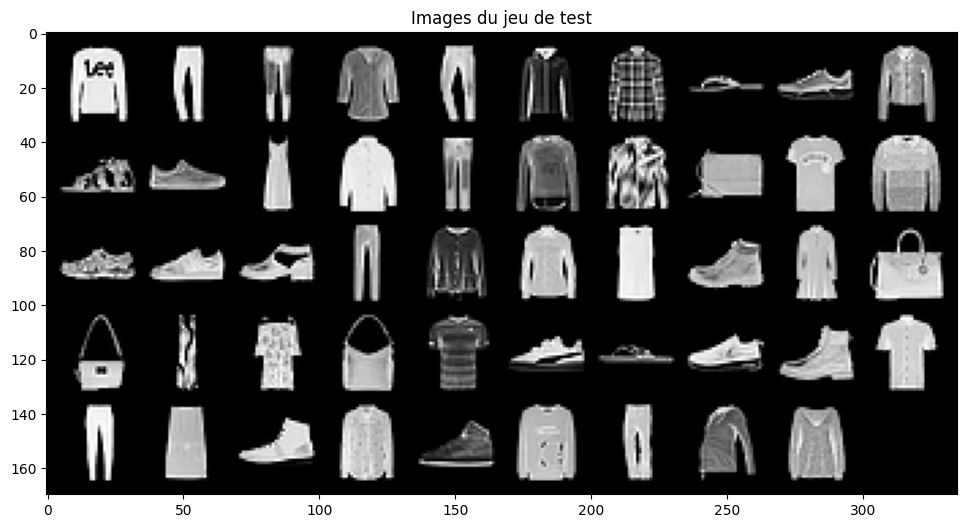

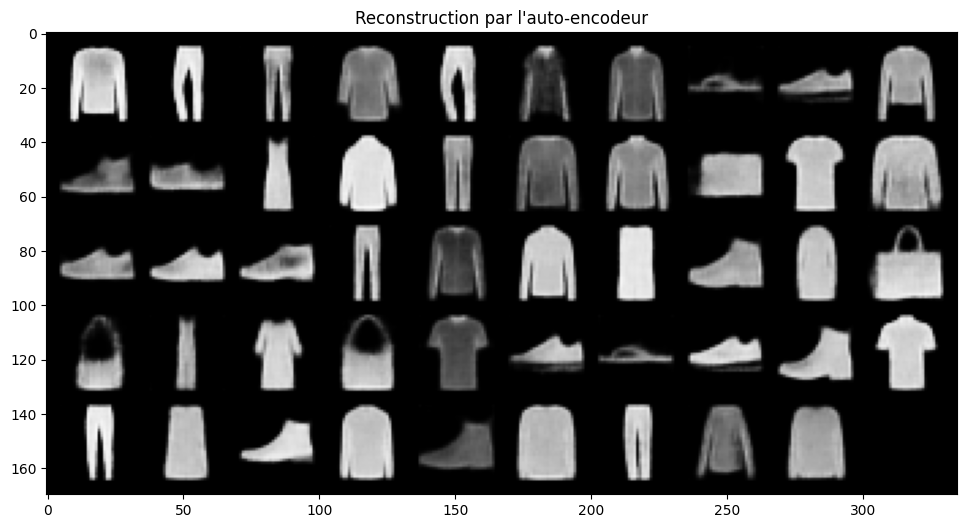

In [20]:
net = autoencoder_conv.eval()
test_dataloader = DataLoader(valid_dataset, batch_size=128, shuffle=False)

images, _ = next(iter(test_dataloader))
# Images de test
plt.figure(figsize=(12, 6))
plt.title("Images du jeu de test")
show_grid(make_grid(images[1:50],10,5))

# Reconstruction et visualisation des images reconstruites
plt.figure(figsize=(12, 6))
plt.title("Reconstruction par l'auto-encodeur")
show_grid(visualize_reconstructions(net, images))



**Débruitage**

---

Une capacité intéressante des auto-encodeurs est leur capacité à apprendre des filtres robustes au bruit. En particulier, en bruitant légèrement une observation, on retrouve généralement la reconstruction moyenne non-bruitée. Cette propriété de débruitage est particulièrement intéressante pour l’amélioration de la qualité des signaux (images, sons, etc.).

Observons la capacité de débruitage de notre auto-encodeur sur un échantillon d’images de test

---

<span style='color:Green'>**Question**</span>

---

Compléter le code ci-dessous pour ajouter un bruit blanc uniforme aux images de test contenues dans le tenseur images. Pensez à ajuster l’amplitude du bruit et à limiter les valeurs des pixels de sortie à la plage autorisée [0,1].

In [21]:
# Bruit blanc (uniforme) centré en 0
noise = 0.2 * torch.randn_like(images)
# Ajout du bruit + troncature des valeurs en dehors de [0,1]
noisy_images = torch.clamp(images + noise, 0, 1)

---

<span style='color:Green'>**Question**</span>

---
Visualiser la reconstruction des images bruitées.

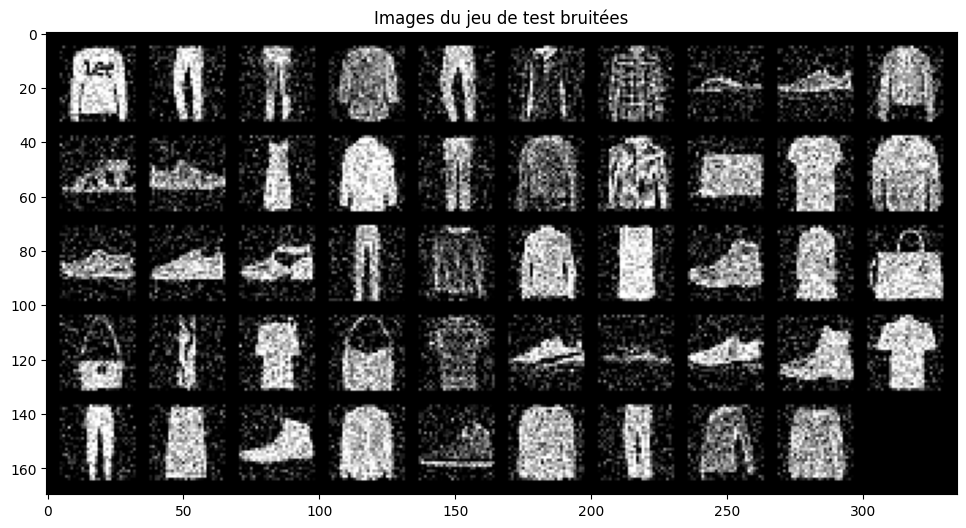

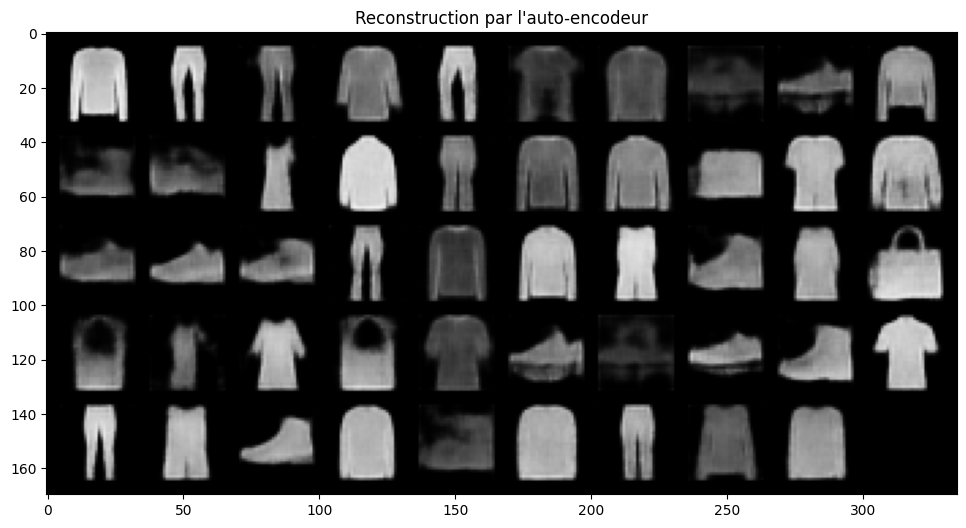

In [22]:
net = autoencoder_conv.eval()
# Images de test
plt.figure(figsize=(12, 6))
plt.title("Images du jeu de test bruitées")
show_grid(make_grid(noisy_images[1:50],10,5))

# Reconstruction et visualisation des images reconstruites
plt.figure(figsize=(12, 6))
plt.title("Reconstruction par l'auto-encodeur")
show_grid(visualize_reconstructions(net, noisy_images))

---

<span style='color:Green'>**Question**</span>

---
Comparer les reconstructions des images bruitées aux reconstructions obtenues sur les images de test originales. Que constatez-vous ?

---
<span style='color:#0d5874'> **Exercice 3 : Autoencodeurs variationnels** </span>

---

![vae-gaussian.png](vae-gaussian.png)

**Implémentation**

Nous allons à présent implémenter un VAE convolutif qui hérite de la même structure que l’auto-encodeur que nous avons précédemment défini. Pour nous simplifier les choses par la suite, nous allons commencer par séparer le sous-réseau qui définit l’encodeur de celui qui définit le décodeur.

<span style='color:Green'>**Question**</span>

En reprenant ce qui a été fait plus haut pour l’auto-encodeur classique, compléter les implémentations ci-dessous de l’encodeur et du décodeur pour le VAE. On rappelle que, contrairement à l’auto-encodeur, la sortie de l’encodeur est double :

+ le vecteur <span style='color:Red'>mu</span> qui contient la moyenne de la gaussienne dans l’espace latent,
+ le vecteur <span style='color:Red'>sigma</span> qui contient les variances selon les différentes directions de la gaussienne dans l’espace latent.


le vecteur sigma qui contient les variances selon les différentes directions de la gaussienne dans l’espace latent.

Ces valeurs seront les paramètres de la gaussienne associée à une observation x. Ces deux vecteurs ont pour dimension la dimension de l’espace latent.

In [23]:
class Encoder(nn.Module):
    def __init__(self, latent_dimension):
        super(Encoder, self).__init__()
        ############# Votre code ici ################
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )
        self.mu = nn.Linear(64*7*7, latent_dimension)
        self.sigma = nn.Linear(64*7*7, latent_dimension)

    def forward(self, x):
        ############# Votre code ici ################
        x = self.encoder(x)
        mu = self.mu(x)
        sigma = self.sigma(x)
        return mu, sigma

class Decoder(nn.Module):
    def __init__(self, latent_dimension):
        super(Decoder, self).__init__()
        ############# Votre code ici ################
        self.decoder_linear = nn.Linear(latent_dimension, 64*7*7)
        self.decoder = nn.Sequential(
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()
        )


    def forward(self, z):
        ############# Votre code ici ################
        x_hat = self.decoder_linear(z)
        x_hat = x_hat.view(-1, 64, 7, 7)
        x_hat = self.decoder(x_hat)
        return x_hat

Nous allons à présent combiner l’encodeur et le décodeur pour former l’auto-encodeur variationnel complet. Il y a néanmoins une petite subtilité car nous devons implémenter l’astuce de reparamétrisation. Celle-ci est implémenter dans la méthode latent_sample

Lors d’un passage avant (forward), le schéma suivant doit se dérouler :

1. L’encodeur prend x en entrée et produit la moyenne mu et la variance logvar de la distribution. En pratique, pour créer mu et logvar deux couches linear en fin du décodeur.

2. On tire un échantillon aléatoire z dans l’espace latent à l’aide de la méthode latent_sample. L’échantillonnage est fait selon la distribution gaussienne latente associée à x grâce à la reparamétrisation. Lors de l’inférence, on ne réalisera pas d’échantillonnage mais on se contentera d’utiliser la moyenne de la gaussienne.

3. L’échantillon aléatoire z est passé dans le décodeur de sorte à obtenir la reconstruction x_recon.

In [24]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, latent_dim):
        super(VariationalAutoencoder, self).__init__()
        ############# Votre code ici ################
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)



    def forward(self, x):
        ############# Votre code ici ################
        mu, logvar = self.encoder(x)
        z = self.latent_sample(mu, logvar)
        x_hat = self.decoder(z)
        return x_hat, mu, logvar

    def latent_sample(self, mu, logvar):
        if self.training:
            ###### Votre code ici ########  -> the reparameterization trick
            std = torch.exp(0.5 * logvar)
            eps = torch.randn_like(std)
            return mu + eps * std
        else:
            return mu

vae_encoder = VariationalAutoencoder(latent_dim = 128)
print(vae_encoder)

VariationalAutoencoder(
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (3): ReLU()
      (4): Flatten(start_dim=1, end_dim=-1)
    )
    (mu): Linear(in_features=3136, out_features=128, bias=True)
    (sigma): Linear(in_features=3136, out_features=128, bias=True)
  )
  (decoder): Decoder(
    (decoder_linear): Linear(in_features=128, out_features=3136, bias=True)
    (decoder): Sequential(
      (0): ReLU()
      (1): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (2): ReLU()
      (3): ConvTranspose2d(32, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (4): Sigmoid()
    )
  )
)


Enfin, il reste à définir la fonction de coût du VAE. D’après le cours, on cherche à maximiser $\mathcal{L}$. Ici, on choisira de minimiser $-\mathcal{L}$ avec


$\mathcal{L}(\theta,\phi ;\boldsymbol{x}) =  \underbrace{\mathbb{E}_{q_\phi(\boldsymbol z | \boldsymbol x)} \left [ \log p_\theta(\boldsymbol x | \boldsymbol z) \right ]}_{\text{Esperance de la vraisemblance}} - \underbrace{KL\, \left (q_\phi(\boldsymbol z | \boldsymbol x) \, || \, p_\theta(\boldsymbol z)\right)}_{\text{ecart au prior}}$

La fonction de coût pour une reconstruction sur une seule donnée $x^{(i)}$ est approximée par :

$\mathcal{L}(\theta,\phi ;\boldsymbol x^{(i)}) \simeq - \frac{1}{2} \sum_j^d \bigl ( 1 + \log((\sigma_j^{(i)})^2) - (\mu_j^{(i)})^2 - (\sigma_j^{(i)})^2  \bigr) - \log p_\theta(\boldsymbol x^{(i)} | \boldsymbol z^{(i)})$

---
**Note**



Dans la plupart des cas, la vraisemblance est supposée gaussienne et la fonction de coût évaluant la reconstruction correspondera donc à l’erreur quadratique moyenne (F.mse_loss()). Dans notre cas, la distribution des valeurs des pixels de Fashion-MNIST est plutôt bimodale. Les images étant à valeurs entre 0 et 1, il est possible d’utiliser une entropie croisée binaire (F.bce_loss()) et c’est cette version qui donne les meilleurs résultats.

---
Le prior $p_{θ}(z)$ est supposé être donné par une loi normale centrée réduite. La divergence de Kullback-Leibler est alors donnée par:

$KL(q_\phi(\boldsymbol z | \boldsymbol x) || p_\theta(\boldsymbol z)) = \frac{1}{2} \bigl( \text{tr}(\boldsymbol \sigma \boldsymbol I) + \boldsymbol \mu^T \boldsymbol \mu - k - \log \text{det}(\boldsymbol \sigma \boldsymbol I)\big) = \frac{1}{2} \sum ( 1 + \log(\sigma) - \mu^2 - \exp^{\log(\sigma)} ) $

In [25]:
def vae_loss(hat_x, x, mu, logvar):
    reconstruction_loss = F.binary_cross_entropy(hat_x, x, reduction='sum')
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return reconstruction_loss + kl_divergence

<span style='color:Green'>**Question**</span>
____

Reprendre les fonctions train et validate définies précedemment et les adapter.

In [26]:
def validate(valid_loader, model, criterion):
    '''
    Function for the validation step of the training loop
    '''
    ###### Votre code ici ########
    running_loss = 0.0
    model.eval()
    with torch.no_grad():
        for images, _ in valid_loader:
            images = images.to(device)
            model.to(device)
            outputs, mu, logvar = model(images)
            loss = criterion(outputs, images, mu, logvar)
            running_loss += loss.item()

    return running_loss

In [27]:
def train(model, train_loader, optimizer, device, epochs=25):
    ###### Votre code ici ########
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, _ in train_loader:
            images = images.to(device)
            model.to(device)
            optimizer.zero_grad()
            outputs, mu, logvar = model(images)
            loss = criterion(outputs, images, mu, logvar)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(train_loader)}")

    print('Finished Training')

In [28]:
criterion = vae_loss
optimizer = torch.optim.Adam(vae_encoder.parameters(),lr=0.0001)
train(vae_encoder,train_loader,optimizer,device)

Epoch 1/25 - Loss: 47344.818038712685
Epoch 2/25 - Loss: 36798.881771388595
Epoch 3/25 - Loss: 35671.170192563965
Epoch 4/25 - Loss: 35002.38931319963
Epoch 5/25 - Loss: 34535.52208405517
Epoch 6/25 - Loss: 34146.09382912447
Epoch 7/25 - Loss: 33817.195966317966
Epoch 8/25 - Loss: 33528.228657216154
Epoch 9/25 - Loss: 33269.833501299305
Epoch 10/25 - Loss: 33044.47350163246
Epoch 11/25 - Loss: 32840.66458722015
Epoch 12/25 - Loss: 32670.19136876999
Epoch 13/25 - Loss: 32512.344316364604
Epoch 14/25 - Loss: 32380.692355743602
Epoch 15/25 - Loss: 32258.461016624467
Epoch 16/25 - Loss: 32149.322669576228
Epoch 17/25 - Loss: 32060.543868270255
Epoch 18/25 - Loss: 31978.64772121535
Epoch 19/25 - Loss: 31904.505388792644
Epoch 20/25 - Loss: 31842.607963252933
Epoch 21/25 - Loss: 31777.3658090685
Epoch 22/25 - Loss: 31722.404455123935
Epoch 23/25 - Loss: 31675.342746368602
Epoch 24/25 - Loss: 31625.409560734275
Epoch 25/25 - Loss: 31585.84815181903
Finished Training


**Visualisation**

Ecrire le code qui permet de visualiser les images réelles et celles produites par le VAE puis comparer le résultat.

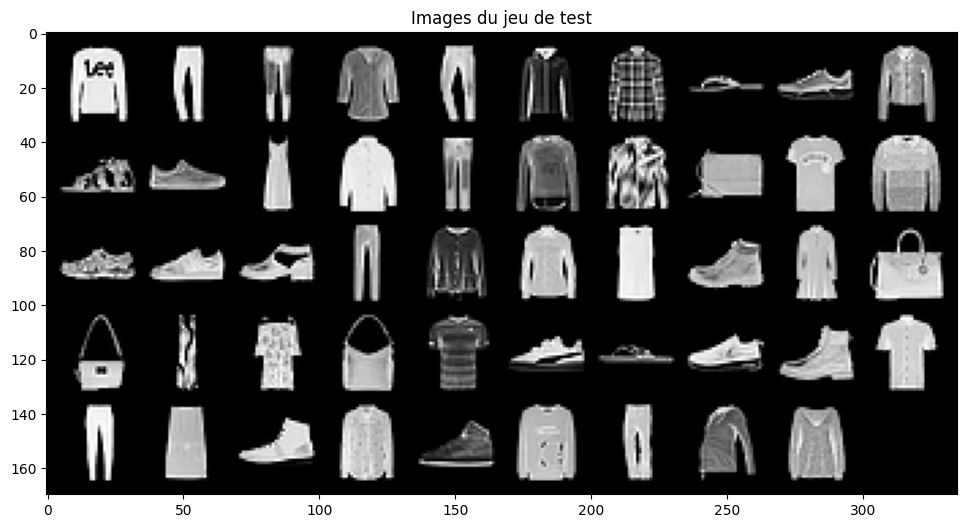

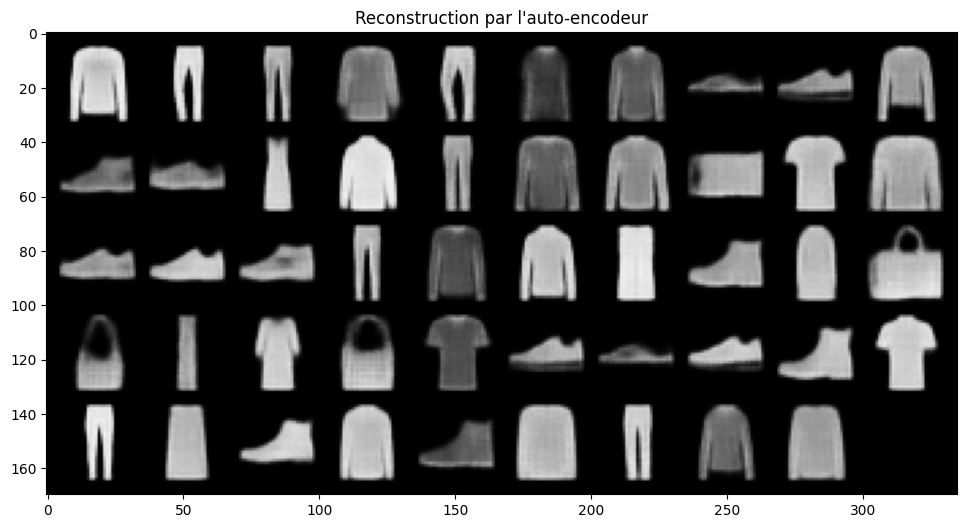

In [29]:
# fonction qui me permet de visualiser l'image reelle et celles produites par VAE
def visualize_reconstructions_vae(net, images, device="cpu"):
    # Mode inférence
    with torch.no_grad():
        images = images.to(device)
        net.to(device)
        reconstructions, _, _ = net(images) # Extract x_hat from the tuple
        image_grid = make_grid(reconstructions[1:50], 10, 5)
        return image_grid.squeeze(0)

#test de la fonction
net = vae_encoder.eval()
test_dataloader = DataLoader(valid_dataset, batch_size=128, shuffle=False)

images, _ = next(iter(test_dataloader))
plt.figure(figsize=(12, 6))
plt.title("Images du jeu de test")
show_grid(make_grid(images[1:50],10,5))

plt.figure(figsize=(12, 6))
plt.title("Reconstruction par l'auto-encodeur")
show_grid(visualize_reconstructions_vae(net, images))

---
<span style='color:#0d5874'> **VAE conditionnel** </span>

---

Dans cette partie on souhaite procéder à la génération conditionnée de chiffre à l'aide d'un autoencodeur variationnel conditionnel.

Pour commencer, on va s'inspirer du modèle de VAE implémenté précedemment qu'on adaptera. On souhaite dans notre cas conditionner le modèle au chiffre représenté par l'image. Cette information correspond dans le jeu de données à une étiquette sous la forme d’un entier de 0 à 9, que l’on représentera plus tard sous la forme d’un vecteur en encodage one-hot, c’est-à-dire : [0, 0, 0, 0, 0, 0, 1, 0, 0, 0] pour l’étiquette 6.

La longueur du vecteur de conditionnement est donc 10 (le nombre de classes du jeu de données).

---
<span style='color:Green'>**Question**</span>

Reprendre le code du VAE et l’adapter de sorte à ce que :
    
* l’encodeur accepte le vecteur de conditionnement comme deuxième argument dans la méthode .forward() . Il faudra notamment décider de l’endroit où injecter le vecteur de conditionnement (on pourra, par exemple, le concaténer au vecteur aplati des features obtenu en sortie des couches convolutives).

* le décodeur accepte le vecteur de conditionnement comme deuxième argument dans la méthode .forward(). On se contentera de concaténer le conditionnement au code latent z.

Attention, il ne faut pas oublier de modifier les dimensions des couches entièrement connectées lorsque cela est nécessaire. En effet, l’espace latent « change » de dimension lorsque que l’on concatène le vecteur de conditionnement au code latent…

**Indice** : torch.cat() peut vous être utile

---


In [30]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        ############# Votre code ici ################
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )
        # Calculate in_features based on the output of the convolutional layers
        self.mu = nn.Linear(in_features=64 * 7 * 7, out_features=10)  # Assuming latent_dim = 10
        self.sigma = nn.Linear(in_features=64 * 7 * 7, out_features=10)  # Assuming latent_dim = 10


    def forward(self, x, c):
        ############# Votre code ici ################
        x = self.encoder(x)
        x = torch.cat((x, c), dim=1)
        # Update in_features for mu and sigma based on concatenation
        self.mu = nn.Linear(in_features=x.shape[1], out_features=10)
        self.sigma = nn.Linear(in_features=x.shape[1], out_features=10)
        mu = self.mu(x)
        sigma = self.sigma(x)
        return mu, sigma


class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        ############# Votre code ici ################
        # Update in_features based on concatenation with condition vector
        self.decoder_linear = nn.Linear(in_features=10 + 10, out_features=64 * 7 * 7) # latent_dim + condition_dim
        self.decoder = nn.Sequential(
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, z, c):
        ############# Votre code ici ################
        x_hat = self.decoder_linear(torch.cat([z, c], dim=1)) # Concatenate z and c
        x_hat = x_hat.view(-1, 64, 7, 7)
        x_hat = self.decoder(x_hat)
        return x_hat




---

<span style='color:Green'>**Question**</span>

De la même façon, modifier l’implémentation de l’autoencodeur variationnel.

---

In [31]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, latent_dim):
        super(VariationalAutoencoder, self).__init__()
        ############# Votre code ici ################
        self.encoder = Encoder()
        self.decoder = Decoder()


    def forward(self, x, c):
        ############# Votre code ici ################
        mu, logvar = self.encoder(x, c)
        z = self.latent_sample(mu, logvar)
        x_hat = self.decoder(z, c)
        return x_hat, mu, logvar

    def latent_sample(self, mu, logvar):
        if self.training:
            # the reparameterization trick
            std = torch.exp(0.5 * logvar)
            eps = torch.randn_like(std)
            return mu + eps * std
        else:
            return mu

La boucle d’apprentissage ne change presque pas : il suffit d’encoder les étiquettes dans le format one-hot et de les fournir au VAE au moment du calcul de la reconstruction.

In [32]:
def train_vae(net, train_dataset, epochs=25, learning_rate=1e-3, batch_size=32, device=device):
    net.to(device)
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    criterion = vae_loss
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images = images.to(device)
            labels = F.one_hot(labels, num_classes=10).float()
            optimizer.zero_grad()
            outputs, mu, logvar = net(images, labels)
            loss = criterion(outputs, images, mu, logvar)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(train_loader)}")
    return net



---

<span style='color:Green'>**Question**</span>

Entraîner le VAE conditionnel sur la base de données MNIST

---

In [33]:
vae = VariationalAutoencoder(latent_dim=10)
vae = train_vae(vae, train_dataset)


Epoch 1/25 - Loss: 10152.443096354167
Epoch 2/25 - Loss: 9883.142802604167
Epoch 3/25 - Loss: 9868.109628125
Epoch 4/25 - Loss: 9861.868623958333
Epoch 5/25 - Loss: 9855.869688020834
Epoch 6/25 - Loss: 9852.21069453125
Epoch 7/25 - Loss: 9849.856017708333
Epoch 8/25 - Loss: 9846.94948671875
Epoch 9/25 - Loss: 9845.371411979168
Epoch 10/25 - Loss: 9843.650171614583
Epoch 11/25 - Loss: 9842.70483046875
Epoch 12/25 - Loss: 9843.203298177083
Epoch 13/25 - Loss: 9840.962645052083
Epoch 14/25 - Loss: 9840.288333854167
Epoch 15/25 - Loss: 9840.016881510417
Epoch 16/25 - Loss: 9839.419842708334
Epoch 17/25 - Loss: 9839.039049739584
Epoch 18/25 - Loss: 9838.8759171875
Epoch 19/25 - Loss: 9837.806009895834
Epoch 20/25 - Loss: 9837.309869010416
Epoch 21/25 - Loss: 9837.160089322917
Epoch 22/25 - Loss: 9836.841625
Epoch 23/25 - Loss: 9836.7138671875
Epoch 24/25 - Loss: 9835.753163802083
Epoch 25/25 - Loss: 9836.357160416666


---

<span style='color:Green'>**Question**</span>

Générer et visualiser des chiffres de différentes classes en échantillonnant dans la distribution conditionnelle. Le code latent est toujours échantillonné selon une loi normale centrée réduite, seul le vecteur de conditionnement change.

---

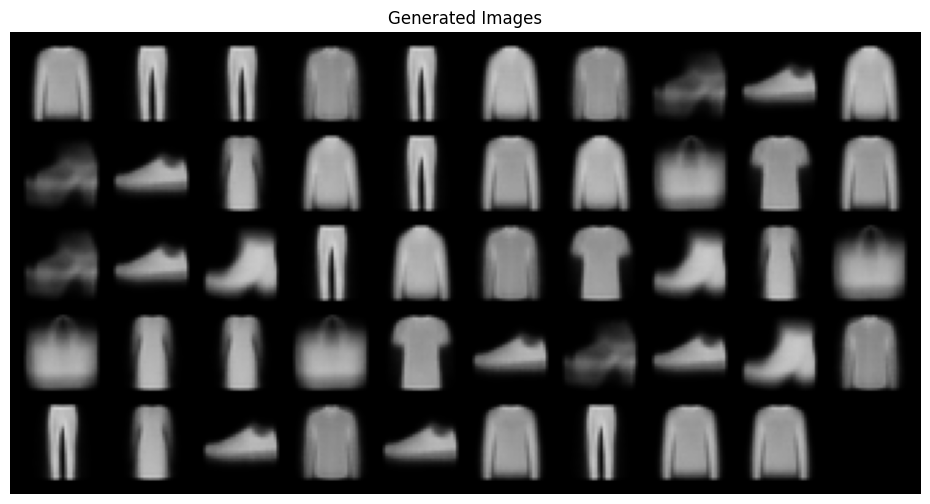

In [34]:
# visualiser les chiffres des classes
def visualize_reconstructions_vae(net, images, labels, device="cpu"):

    with torch.no_grad():
        images = images.to(device)
        labels = F.one_hot(labels, num_classes=10).float()
        net.to(device)
        reconstructions, _, _ = net(images, labels) # Extract x_hat from the tuple
        image_grid = make_grid(reconstructions[1:50], 10, 5)
        return image_grid.cpu() # Move image_grid to CPU for visualization


# Get a batch of images and labels from the test dataloader
test_dataloader = DataLoader(valid_dataset, batch_size=128, shuffle=False)
images, labels = next(iter(test_dataloader)) # This line is added

# Call the function and get the image grid
image_grid = visualize_reconstructions_vae(vae, images, labels)

# Display the image grid using Matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(np.transpose(image_grid.numpy(), (1, 2, 0)))
plt.title("Generated Images")
plt.axis("off")  # Hide axes
plt.show() # This line displays the plot